# Regresión lineal regularizada: sesgo y varianza

## Preprocesamiento de los datos

In [1]:
import numpy as np

In [2]:
from scipy.io import loadmat

In [3]:
data = loadmat('datasets/ex5data1.mat')

X_train = data['X']
y_train = data['y']
X_val = data['Xval']
y_val = data['yval']
X_test = data['Xtest']
y_test = data['ytest']

print("X_train.shape:{}y_train.shape:{}\nX_val.shape:{}y_val.shape{}\nX_test.shape:{}y_test.shape:{}".format(X_train.shape,y_train.shape,X_val.shape,y_val.shape,X_test.shape,y_test.shape))

X_train.shape:(12, 1)y_train.shape:(12, 1)
X_val.shape:(21, 1)y_val.shape(21, 1)
X_test.shape:(21, 1)y_test.shape:(21, 1)


In [35]:
def cost(th, X, y, reg):
    m = len(X)
    Xs = np.insert(X, 0, values=np.ones(m), axis=1)
    J = (1/(2*m))*np.sum((np.dot(Xs, th.T) - y)**2) + np.sum(th[1:]**2)*(reg/(2*m))
    return J

def gradient(th, X, y, reg):
    m = len(X)
    Xs = np.insert(X, 0, values=np.ones(m), axis=1)
    gr = (1/m)*np.dot(Xs.T, (np.dot(Xs, th.T) - y))
    gr += np.insert(th[1:]*(reg/m), 0, values=0, axis=0)
    return gr

def cg(th, X, y, reg):
    return (cost(th,X,y,reg), gradient(th,X,y,reg))

In [85]:
import matplotlib.pyplot as plt
plt.rc('text', usetex=False)
plt.rc('font', family='serif')

Text(0.5,0,'Change in water level(x)')

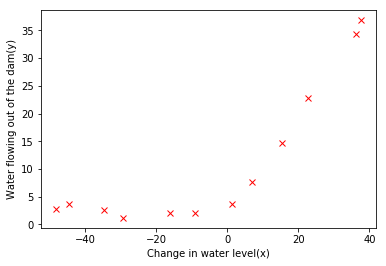

In [6]:
plt.figure()
plt.plot(X_train, y_train, 'rx')
plt.ylabel('Water flowing out of the dam(y)')
plt.xlabel('Change in water level(x)')

In [29]:
m_train = len(X_train)
m_val = len(X_val)
m_test = len(X_test)
th_initial = np.ones(len(X_train[0]) + 1)
reg = 1.0

In [30]:
cost(th_initial, X_train, np.ravel(y_train), reg)

303.9931922202643

In [36]:
gradient(th_initial, X_train, np.ravel(y_train), reg)

array([-15.30301567, 598.25074417])

In [14]:
import scipy.optimize as opt

In [15]:
fmin  = opt.minimize(fun=cg, x0=th_initial, args=(X_train, np.ravel(y_train), 0),
                       method='TNC', jac=True, options={'maxiter':70})
th_opt = fmin.x
print ("Coste óptimo obtenido con scipy.optimize.fmin_tnc():{}".format(cost(th_opt, X_train, np.ravel(y_train), 0)))

Coste óptimo obtenido con scipy.optimize.fmin_tnc():22.373906495108997


Text(0.5,0,'Change in water level(x)')

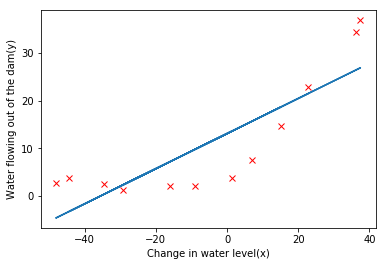

In [16]:
X_train_ones = np.insert(X_train, 0, values=np.ones(m_train), axis=1)
plt.plot(X_train, y_train, 'rx', X_train, np.dot(X_train_ones, th_opt.T))
plt.ylabel('Water flowing out of the dam(y)')
plt.xlabel('Change in water level(x)')

In [92]:
def learning_analysis(X_train, y_train, X_val, y_val, reg):
    m_train = len(X_train)
    th_initial = np.ones(len(X_train[0]) + 1)
    lth_train = []
    for i in range(1,m_train + 1):
        x_i = X_train[:i,:]
        y_i = np.ravel(y_train[:i])
        fmin_i  = opt.minimize(fun=cg, x0=th_initial, args=(x_i, y_i, reg),
                           method='TNC', jac=True, options={'maxiter':100})
        lth_train.append(fmin_i.x)

    lcost_train = np.zeros(m_train)
    lcost_val = np.zeros(m_train)
    for i, th_i in enumerate(lth_train):
        xt_i = X_train[:i+1,:]
        yt_i = np.ravel(y_train[:i+1])
        lcost_train[i] = cost(th_i, xt_i, yt_i, 0)
        lcost_val[i] = cost(th_i, X_val, np.ravel(y_val), 0)
    return(lcost_train, lcost_val)

In [93]:
def show_learning_analysis(x1, y1, x2, y2, reg):
    lcost = learning_analysis(x1, y1, x2, y2, reg)
    plt.plot(lcost[0])
    plt.plot(lcost[1])
    plt.title('Learning curve for linear regression ($ \lambda $ = {})'.format(reg))
    plt.ylabel('Error')
    plt.xlabel('Number of training examples')

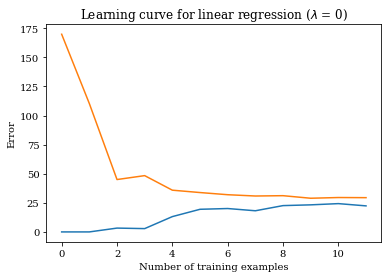

In [94]:
show_learning_analysis(X_train, y_train, X_val, y_val, 0)

In [49]:
def poly(X, p):
    xret = np.array(X)
    for i in range(0,p):
        xret = np.c_[xret, xret[:,0]**(i+2)]
    return xret

def norm(x):
    mu = [np.mean(x[:,i]) for i in range(0,len(x[0]))]
    sigma = [np.std(x[:,i]) for i in range(0,len(x[0]))]
    xnorm = (x - mu)/sigma
    return xnorm, np.ravel(mu), np.ravel(sigma)

In [103]:
p = 8
X_train_poly = poly(X_train, p)
X_train_poly, mu, sigma = norm(X_train_poly)
th_initial = np.ones(len(X_train_poly[0]) + 1)

In [61]:
fmin_poly  = opt.minimize(fun=cg, x0=th_initial, args=(X_train_poly, np.ravel(y_train), 0),
                       method='TNC', jac=True, options={'maxiter':70})
th_opt_poly = fmin_poly.x

ValueError: x and y must have same first dimension, but have shapes (1712,) and (12,)

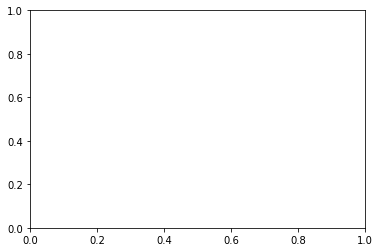

In [71]:
X_train_ones = np.insert(X_train_poly, 0, values=np.ones(m_train), axis=1)
plt.plot(X_train, y_train, 'rx', np.arange(np.min(X_train), np.max(X_train), 0.05), np.dot(X_train_ones, th_opt_poly.T))
plt.ylabel('Water flowing out of the dam(y)')
plt.xlabel('Change in water level(x)')

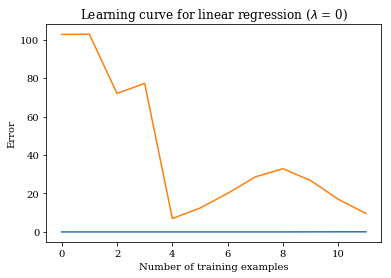

In [91]:
X_train_poly_val = poly(X_val, p)
X_train_poly_val, mu, sigma = norm(X_train_poly_val)
show_learning_analysis(X_train_poly, y_train, X_train_poly_val, y_val, 0)

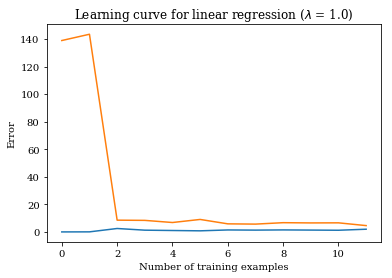

In [95]:
show_learning_analysis(X_train_poly, y_train, X_train_poly_val, y_val, 1.0)

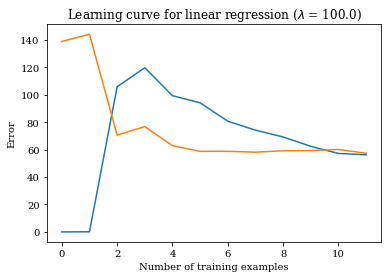

In [97]:
show_learning_analysis(X_train_poly, y_train, X_train_poly_val, y_val, 100.0)

In [123]:
reg_array = np.array([0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10])

th_initial = np.ones(len(X_train[0]) + 1)
cost_reg_array_train = []
cost_reg_array_val = []
for r in reg_array:
    fmin  = opt.minimize(fun=cg, x0=th_initial, args=(X_train, np.ravel(y_train), r),
                       method='TNC', jac=True, options={'maxiter':70})
    cost_reg_array_train.append(cost(fmin.x, X_train, y_train, reg=r))
    cost_reg_array_val.append(cost(fmin.x, X_val, y_train, reg=r))

Text(0.5,0,'$ \\lambda $')

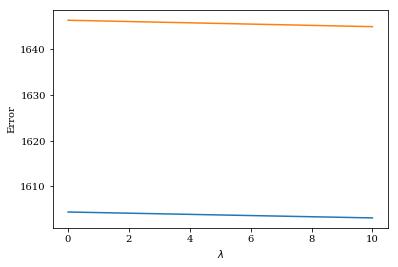

In [124]:
plt.plot(reg_array, cost_reg_array_train)
plt.plot(reg_array, cost_reg_array_val)
plt.ylabel('Error')
plt.xlabel('$ \lambda $')

In [119]:
# entrenamiento con el mejor lambda encontrado
th_initial = np.ones(len(X_train_poly[0]) + 1) # sustituir por los th optimos 
fmin_poly_breg  = opt.minimize(fun=cg, x0=th_initial, args=(X_train_poly, np.ravel(y_train), 3.0),
                       method='TNC', jac=True, options={'maxiter':700})
th_opt_poly_breg = fmin_poly_breg.x
# coste usando los pesos entrenados sobre X_train, y_train, 
X_test_poly = poly(X_test, p)
test_cost = cost(th_opt_poly_breg, (X_test_poly - mu)/sigma, y_test, reg=3.0)
print(test_cost)

3847.467793414502
